<a href="https://colab.research.google.com/github/lalitha-sahitya/titanic-survival-prediction/blob/main/titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od
import pandas as pd
od.download('https://www.kaggle.com/competitions/titanic')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sahityapalacharla
Your Kaggle Key: ··········


100%|██████████| 34.1k/34.1k [00:00<00:00, 32.2MB/s]


Extracting archive ./titanic/titanic.zip to ./titanic


In [4]:
os.listdir('titanic')

['train.csv', 'test.csv', 'gender_submission.csv']

In [5]:
df=pd.read_csv('/content/titanic/train.csv')
test_df=pd.read_csv('/content/titanic/test.csv')

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df_num=df[['Pclass','Age','SibSp','Parch','Fare']]
df_cat=df[['Survived','Sex','Ticket','Cabin','Embarked']]

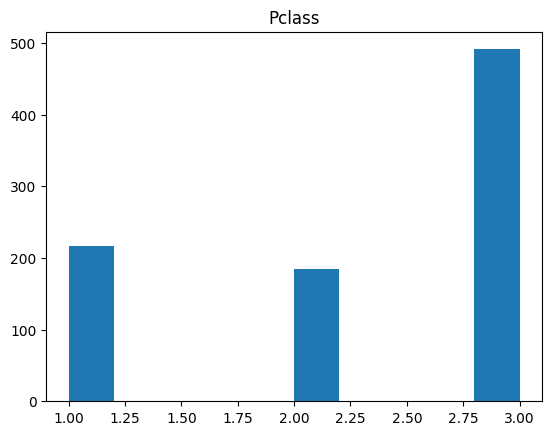

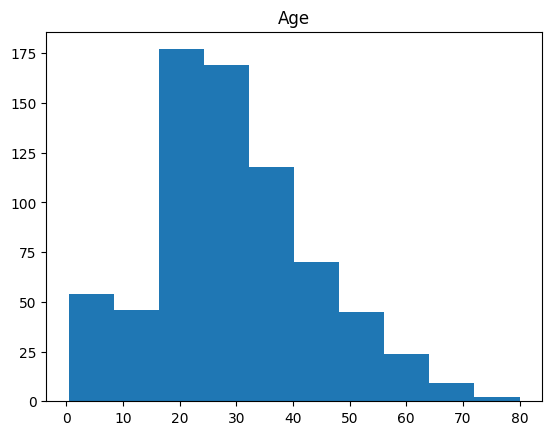

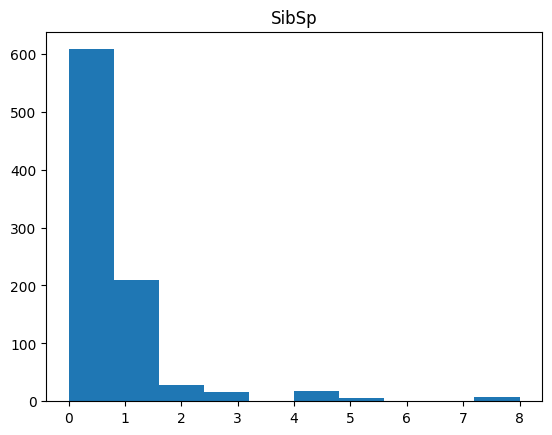

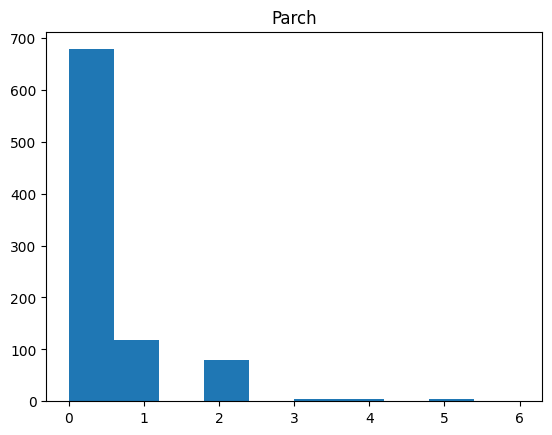

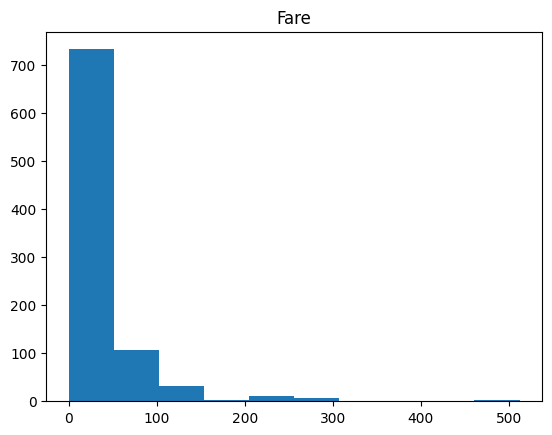

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
for i in df_num.columns:
  plt.hist(df_num[i])
  plt.title(i)
  plt.show()

<Axes: xlabel='Sex', ylabel='Survived'>

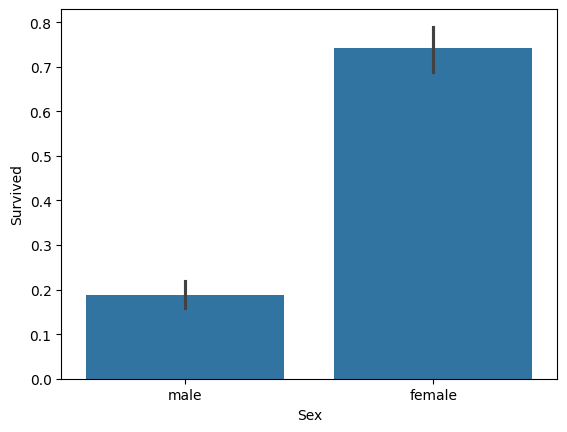

In [14]:
import seaborn as sns
sns.barplot(x='Sex',y='Survived',data=df)

<Axes: xlabel='Embarked', ylabel='Survived'>

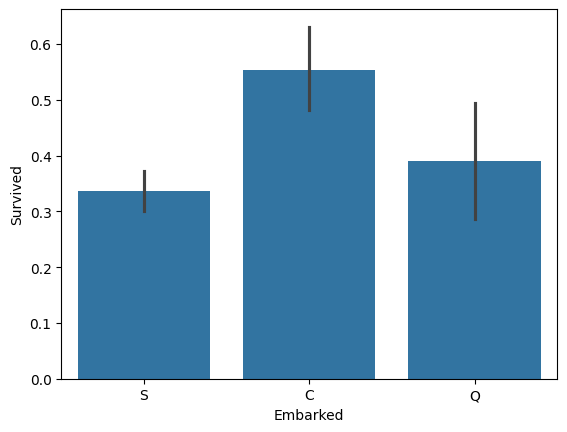

In [15]:
sns.barplot(x='Embarked',y='Survived',data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

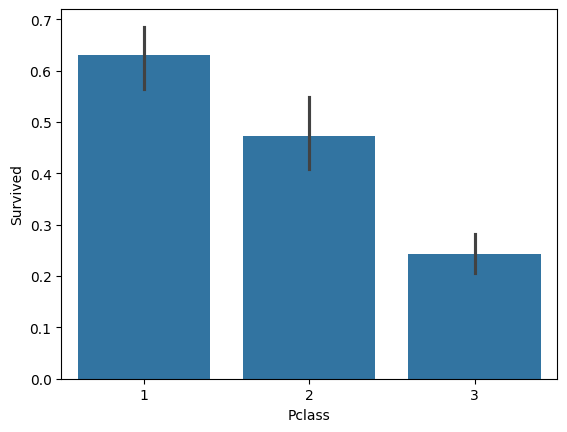

In [18]:
sns.barplot(x='Pclass',y='Survived',data=df)

<Axes: xlabel='Fare', ylabel='Count'>

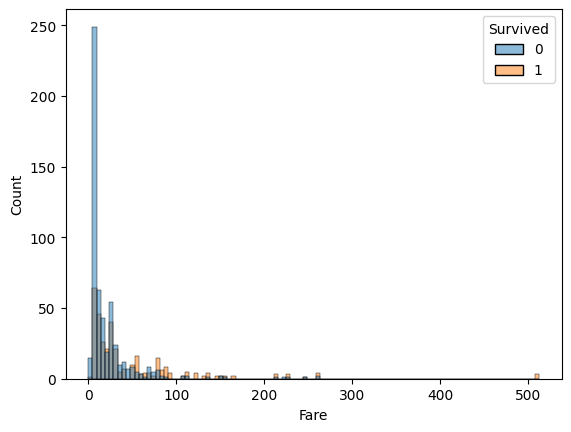

In [24]:
sns.histplot(x='Fare',data=df,hue='Survived')

<Axes: xlabel='Age', ylabel='Count'>

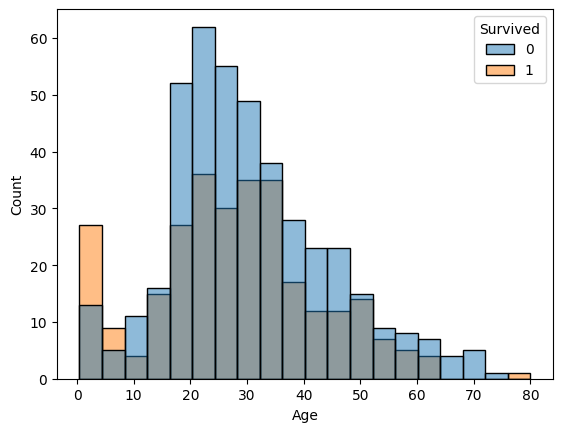

In [ ]:
sns.histplot(x='Age',data=df,hue='Survived')

In [19]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df=df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [21]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [22]:
test_df=test_df.drop(['PassengerId','Cabin','Name','Ticket'],axis=1)

In [23]:
test_df.isna().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Fare,1
Embarked,0


In [25]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [26]:
df['Sex'].value_counts()

,count
Sex,
male,577
female,314


In [27]:
df['Embarked'].value_counts()

,count
Embarked,
S,644
C,168
Q,77


In [28]:
df['Sex']=df.Sex.map({'male':0,'female':1}).fillna(df['Sex'].mode())

In [29]:
test_df['Sex']=test_df.Sex.map({'male':0,'female':1}).fillna(test_df['Sex'].mode())

In [30]:
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,Q
1,3,1,47.0,1,0,7.0000,S
2,2,0,62.0,0,0,9.6875,Q
3,3,0,27.0,0,0,8.6625,S
4,3,1,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,S
414,1,1,39.0,0,0,108.9000,C
415,3,0,38.5,0,0,7.2500,S
416,3,0,NaN,0,0,8.0500,S


In [31]:
df['Embarked']=df.Embarked.map({'S':0,'C':1,'Q':2})

In [32]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0]).astype(int)

In [33]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0
887,1,1,1,19.0,0,0,30.0000,0
888,0,3,1,NaN,1,2,23.4500,0
889,1,1,0,26.0,0,0,30.0000,1


In [34]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,0


In [35]:
test_df['Embarked']=test_df.Embarked.map({'S':0,'C':1,'Q':2}).fillna(test_df['Embarked'].mode()[0])
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,NaN,0,0,8.0500,0
414,1,1,39.0,0,0,108.9000,1
415,3,0,38.5,0,0,7.2500,0
416,3,0,NaN,0,0,8.0500,0


In [36]:
test_df['Embarked'].isna().sum()

0

In [37]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median').fit(df[['Age']])
df[['Age']] = imputer.transform(df[['Age']])
test_df[['Age']] = imputer.transform(test_df[['Age']])

In [38]:
df['Age']=df['Age'].astype(int)

In [40]:
df.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [41]:
test_df['Age']=test_df['Age'].astype(int)
test_df

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34,0,0,7.8292,2
1,3,1,47,1,0,7.0000,0
2,2,0,62,0,0,9.6875,2
3,3,0,27,0,0,8.6625,0
4,3,1,22,1,1,12.2875,0
...,...,...,...,...,...,...,...
413,3,0,28,0,0,8.0500,0
414,1,1,39,0,0,108.9000,1
415,3,0,38,0,0,7.2500,0
416,3,0,28,0,0,8.0500,0


In [42]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7.2500,0
1,1,1,1,38,1,0,71.2833,1
2,1,3,1,26,0,0,7.9250,0
3,1,1,1,35,1,0,53.1000,0
4,0,3,0,35,0,0,8.0500,0
...,...,...,...,...,...,...,...,...
886,0,2,0,27,0,0,13.0000,0
887,1,1,1,19,0,0,30.0000,0
888,0,3,1,28,1,2,23.4500,0
889,1,1,0,26,0,0,30.0000,1


In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [44]:
test_df=test_df.fillna(test_df.Fare.mean())

In [46]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [45]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x,y,test_size=0.2,random_state=42)

In [48]:
X_train.Embarked.value_counts()

,count
Embarked,
0,527
1,125
2,60


In [49]:
X_val

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
709,3,0,28,1,1,15.2458,1
439,2,0,31,0,0,10.5000,0
840,3,0,20,0,0,7.9250,0
720,2,1,6,0,1,33.0000,0
39,3,1,14,1,0,11.2417,1
...,...,...,...,...,...,...,...
433,3,0,17,0,0,7.1250,0
773,3,0,28,0,0,7.2250,1
25,3,1,38,1,5,31.3875,0
84,2,1,17,0,0,10.5000,0


In [50]:
df.corr()['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Sex,0.543351
Fare,0.257307
Embarked,0.106811
Parch,0.081629
SibSp,-0.035322
Age,-0.064909
Pclass,-0.338481


In [51]:
test_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.363636,29.779904,0.447368,0.392344,35.627188,0.464115
std,0.841838,0.481622,12.686191,0.896760,0.981429,55.840500,0.685516
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,1.000000,35.750000,1.000000,0.000000,31.500000,1.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)
train_preds=model.predict(X_train)
val_preds=model.predict(X_val)

In [53]:
from sklearn.metrics import accuracy_score,precision_score
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.800561797752809
0.7988826815642458
0.7625
0.7714285714285715


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
train_preds = dt.predict(X_train)
val_preds=dt.predict(X_val)


In [55]:
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.9789325842696629
0.7932960893854749
0.996078431372549
0.7402597402597403


In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
train_preds = rf.predict(X_train)
val_preds=rf.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.9789325842696629
0.8156424581005587
0.9846743295019157
0.7808219178082192


In [57]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',C=1)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
val_preds=model.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.6685393258426966
0.6536312849162011
0.66
0.75


In [58]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
val_preds=model.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.7879213483146067
0.7039106145251397
0.7489361702127659
0.6842105263157895


In [59]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100,random_state=42,learning_rate=0.1,max_depth=3)
gb.fit(X_train, y_train)

train_preds = gb.predict(X_train)
val_preds=gb.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.9030898876404494
0.8212290502793296
0.9383259911894273
0.8387096774193549


In [60]:
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=1)
ada_clf = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)
ada_clf.fit(X_train, y_train)
train_preds = ada_clf.predict(X_train)
val_preds=ada_clf.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.8370786516853933
0.8044692737430168
0.8089430894308943
0.76


In [61]:
from sklearn.ensemble import BaggingClassifier
base_estimator = DecisionTreeClassifier()
bg = BaggingClassifier(estimator=base_estimator,
                                n_estimators=100,
                                max_samples=0.5,
                                max_features=0.5,
                                bootstrap=True,
                                random_state=42)
bg.fit(X_train, y_train)
train_preds = bg.predict(X_train)
val_preds=bg.predict(X_val)
print(accuracy_score(y_train,train_preds))
print(accuracy_score(y_val,val_preds))
print(precision_score(y_train,train_preds))
print(precision_score(y_val,val_preds))

0.9115168539325843
0.8044692737430168
0.9767441860465116
0.8305084745762712


In [62]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    int64  
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 23.0 KB


In [63]:
test_preds=gb.predict(test_df)

In [64]:
test_preds

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [65]:
submission_df=pd.read_csv('/content/titanic/gender_submission.csv')
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [66]:
submission_df['Survived']=test_preds

In [67]:
submission_df

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [68]:
submission_df.to_csv('submission_df.csv',index=False)

In [69]:
from google.colab import files
files.download('submission_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>